In [16]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('C:/Users/capta/Downloads/cr_data.csv')

In [28]:
training_df = df.sample(frac=0.7, random_state=25)

In [29]:
testing_df = df.drop(training_df.index)

In [30]:
print(f"No. of training examples: {training_df.shape[0]}")

No. of training examples: 204


In [31]:
print(f"No. of testing examples: {testing_df.shape[0]}")

No. of testing examples: 88


In [32]:
x_train = training_df.iloc[:, 1:6]

In [33]:
y_train = training_df['TAN']

In [34]:
x_test = testing_df.iloc[:, 1:6]

In [35]:
y_test = testing_df['TAN']

In [36]:
rf = RandomForestRegressor(n_estimators=800, random_state=0, min_samples_leaf=150)

In [37]:
rf.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=150, n_estimators=800, random_state=0)

In [38]:
y_pred = rf.predict(x_test)

In [39]:
res = pd.DataFrame(testing_df)

In [40]:
res['Predict'] = y_pred

In [41]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.14520590080593632


In [42]:
err=sum(abs(y_test-y_pred))

In [43]:
acc=100-(err/sum(y_test)*100)

In [44]:
print('Error:', err)

Error: 6.614888836654709


In [45]:
print('Accuracy:',acc)

Accuracy: 88.69805214278708


In [46]:
y=testing_df['TAN']
x=testing_df.iloc[:,1]
z=y_pred

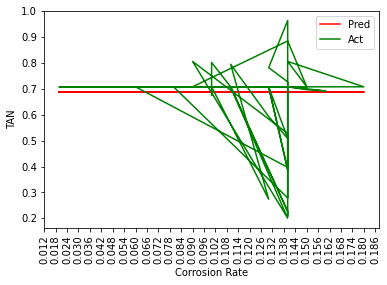

In [47]:
ax = plt.subplot()
ax.xaxis.set_major_locator(ticker.MaxNLocator(30))
ax.plot(x, z, color='red')
ax.plot(x, y, color='green')
ax.set(xlabel='Corrosion Rate', ylabel='TAN')
plt.xticks(rotation=90)
plt.legend(['Pred', 'Act'])
plt.show()